<a href="https://colab.research.google.com/github/DODHIAMBOO/Python-projects/blob/main/Copy_of_Final_March_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk -q
!pip install langdetect -q
!pip install contractions -q

import re
import nltk
import numpy as np
import pandas as pd
import contractions
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from langdetect import detect
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

stop = stopwords.words('english')
print(len(stop))

179


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/March2022.csv', encoding = 'utf-16')

df.shape

(482, 16)

In [ ]:
df.head(482)

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
0,com.mcoopcash.retail,NaN,NaN,en,DRDA_sprout,2022-03-01T00:37:44Z,1646095064711,2022-03-01T09:03:46Z,1646125426268,1,NaN,Good,2022-03-14T06:42:32Z,1.647240e+12,"Thank you for your kind words, let’s keep this...",http://play.google.com/console/developers/7671...
1,com.mcoopcash.retail,NaN,NaN,en,1915,2022-03-01T11:44:10Z,1646135050058,2022-03-01T11:44:10Z,1646135050058,1,NaN,It keeps crushing as I finish registering 😖😖it...,2022-03-14T06:43:33Z,1.647240e+12,"Hi, we are sorry that you're having issues wit...",http://play.google.com/console/developers/7671...
2,com.mcoopcash.retail,50067.0,5.0.67,en,Infinix-X680,2022-03-01T18:45:42Z,1646160342930,2022-03-01T18:45:42Z,1646160342930,1,NaN,NaN,NaN,NaN,NaN,NaN
3,com.mcoopcash.retail,50067.0,5.0.67,en,OP486C,2022-03-02T15:40:07Z,1646235607923,2022-03-02T15:40:07Z,1646235607923,2,NaN,Cooperative Bank is a very successful bank in ...,2022-03-14T06:45:47Z,1.647240e+12,Hello Lawrence. The app is functioning well. D...,http://play.google.com/console/developers/7671...
4,com.mcoopcash.retail,50067.0,5.0.67,en,RMX2180,2022-03-02T18:32:01Z,1646245921728,2022-03-02T18:32:01Z,1646245921728,1,NaN,All Ur apps ni balaa tu just reg it's like u n...,2022-03-14T06:47:35Z,1.647240e+12,"Hi, We would like to chat with you with regard...",http://play.google.com/console/developers/7671...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,com.mcoopcash.retail,50100.0,5.1.0,en,TECNO-CG6,2022-03-31T14:25:27Z,1648736727217,2022-03-31T14:25:27Z,1648736727217,1,NaN,Very disappointing the previous one was better.,2022-04-04T11:24:24Z,1.649071e+12,Hello. Thank you for the feedback. Please upda...,http://play.google.com/console/developers/7671...
478,com.mcoopcash.retail,50100.0,5.1.0,en,Ulefone_S7,2022-03-31T15:54:40Z,1648742080823,2022-03-31T15:54:42Z,1648742082098,5,NaN,Can I yous this app without line,2022-04-04T11:24:36Z,1.649071e+12,Hello. Thank you for the feedback. Please upda...,http://play.google.com/console/developers/7671...
479,com.mcoopcash.retail,50100.0,5.1.0,en,j4primelte,2022-03-31T16:00:09Z,1648742409115,2022-03-31T16:00:09Z,1648742409115,1,NaN,The registration process itself is stressful e...,2022-04-04T11:24:44Z,1.649071e+12,Hello. Thank you for the feedback. Please upda...,http://play.google.com/console/developers/7671...
480,com.mcoopcash.retail,NaN,NaN,en,TECNO-CF8,2022-03-31T17:16:29Z,1648746989933,2022-03-31T17:16:29Z,1648746989933,1,NaN,Completely a hell of an app,2022-04-04T11:04:58Z,1.649070e+12,Hello. Thank you for the feedback. Please upda...,http://play.google.com/console/developers/7671...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


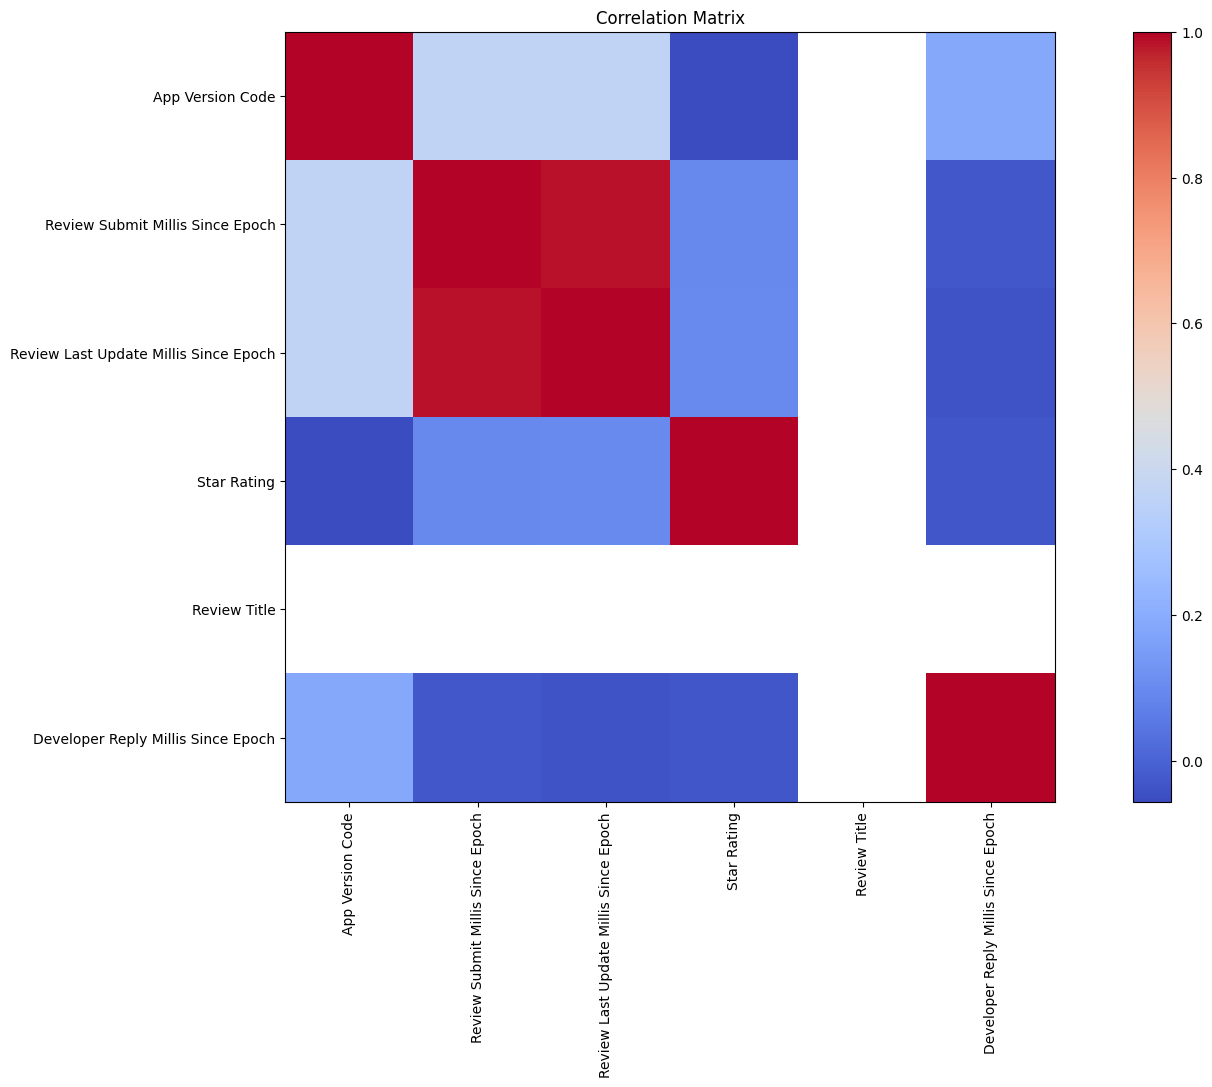

In [ ]:
corr = df.corr()

plt.figure(figsize = (20, 10))
plt.imshow(corr, cmap = 'coolwarm', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation = 90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df.isnull().sum())

Package Name                               0
App Version Code                          81
App Version Name                          81
Reviewer Language                          0
Device                                     4
Review Submit Date and Time                0
Review Submit Millis Since Epoch           0
Review Last Update Date and Time           0
Review Last Update Millis Since Epoch      0
Star Rating                                0
Review Title                             482
Review Text                               68
Developer Reply Date and Time            125
Developer Reply Millis Since Epoch       125
Developer Reply Text                     125
Review Link                               68
dtype: int64


In [ ]:
df.drop(['Review Title', 'Reviewer Language', 'Device', 'Star Rating'], axis = 1, inplace = True)
df.dropna(subset = ['Review Text'], inplace = True)
df.dropna(subset = ['Developer Reply Millis Since Epoch'], inplace = True)
df.dropna(subset = ['App Version Code', 'App Version Name'], inplace = True)

df.shape

(307, 12)

In [ ]:
sample = df[['Review Text']].rename(columns = {'Review Text': 'review'})
sample = sample.reset_index(drop = True)

sample.head()

,review
0,Cooperative Bank is a very successful bank in ...
1,All Ur apps ni balaa tu just reg it's like u n...
2,"You are the worst bank I swear, your other app..."
3,It doesn't work. Keeps telling me to confirm d...
4,This app is just Hokum


In [ ]:
sample = sample.drop(index=75)
sample = sample.reset_index(drop = True)

In [ ]:
# sample.at[89, 'review'] = 'Very poor'
# sample.at[17, 'review'] = 'This system of yours, it is so boring do since yesterday i cannot even make a mobile withdrawal, I am supposed to sleep hungry and I have money, and the way ATMs are not available in the rural area , I am very bored'
# sample.at[32, 'review'] = 'Very fake that is this bank is a no'
# sample.at[198, 'review'] = 'why are you torturing us...how many times will you be told this app does not work'
# sample.at[263, 'review'] = 'It is not very interesting when my account is closed, when I call customer care, I really do not like it, even whatsapp, they have no support at all, the customer service staff as well'
# sample.at[281, 'review'] = 'who came up with this nonsense. the app has a lot of pictures of people and it does not work'
# sample.at[1, 'review'] = 'All Ur apps are just awful just reg it is like u need free Million many complications and many sorry disgusting'

In [ ]:
detections = []

for index, row in sample.iterrows():
  if detect(row['review']) != 'en':
    language = 'en'
  else:
    language = detect(row['review'])
  detections.append(language)

sample['language'] = detections

sample.head(100)

,review,language
0,Cooperative Bank is a very successful bank in ...,en
1,All Ur apps ni balaa tu just reg it's like u n...,en
2,"You are the worst bank I swear, your other app...",en
3,It doesn't work. Keeps telling me to confirm d...,en
4,This app is just Hokum,et
...,...,...
95,"Hi why are you guys dissappointing like this,t...",en
96,It is really a pitty that evwn after all below...,en
97,Contender for the Worst Banking System in the ...,en
98,Need to find a way to upgrade your services......,en


In [ ]:
url_regex = r'http\S+'
mention_regex = r'@\w+'
hashtag_regex = r'#\w+'
punctuation_regex = r'[^a-zA-Z\s]'
nonalpha_regex = r'[^\w\s\',\.\']'

def clean_text(text):
  text = re.sub(url_regex, '', text)
  text = re.sub(mention_regex, '', text)
  text = re.sub(hashtag_regex, '', text)
  text = re.sub(punctuation_regex, '', text)
  text = re.sub(nonalpha_regex, '', text)
  text = text.lower()
  return text

sample['clean_review'] = sample['review'].apply(clean_text)

column_to_expand = 'clean_review'
for i, text in enumerate(sample[column_to_expand]):
    expanded_words = []   
    for word in text.split():
      expanded_words.append(contractions.fix(word))
      expanded_text = ' '.join(expanded_words)
      sample.loc[i, column_to_expand] = expanded_text

column_to_modify = 'clean_review'
for i, text in enumerate(sample[column_to_modify]):
  clean_sample = text.replace("...", " ")
  clean_sample = text.replace(" ... ", " ")
  clean_sample = text.replace("..", " ")
  clean_sample = text.replace(",,,,", " ")
  clean_sample = text.replace(",", "")
  clean_sample = text.replace(", ", "")
  clean_sample = text.replace(" ,", "")
  clean_sample = text.replace(" , ", "")
  clean_sample = text.replace(".", "")
  sample.loc[i, column_to_modify] = clean_sample

sample['clean_review'] = sample['clean_review'].apply(lambda item: " ".join(item for item in item.split() if item not in stop))

sample.head(307)

,review,language,clean_review
0,Cooperative Bank is a very successful bank in ...,en,cooperative bank successful bank kenya come ca...
1,All Ur apps ni balaa tu just reg it's like u n...,en,apps ni balaa tu reg like need free million co...
2,"You are the worst bank I swear, your other app...",en,worst bank swear app never fixed downloaded on...
3,It doesn't work. Keeps telling me to confirm d...,en,work keeps telling confirm details
4,This app is just Hokum,et,app hokum
...,...,...,...
301,1 Star is actually too big a rating. App keeps...,en,star actually big rating app keeps saying bloc...
302,Very disappointing the previous one was better.,en,disappointing previous one better
303,Can I yous this app without line,en,yous app without line
304,The registration process itself is stressful e...,en,registration process stressful enough delete


In [ ]:
sample['polarity'] = None
sample['subjectivity'] = None

for index, row in sample.iterrows():
  new_review = row['review']
  blob = TextBlob(new_review)
  sample.at[index, 'polarity'] = blob.sentiment.polarity
  sample.at[index, 'subjectivity'] = blob.sentiment.subjectivity

sample.head(307)

,review,language,clean_review,polarity,subjectivity
0,Cooperative Bank is a very successful bank in ...,en,cooperative bank successful bank kenya come ca...,-0.008333,0.716667
1,All Ur apps ni balaa tu just reg it's like u n...,en,apps ni balaa tu reg like need free million co...,-0.366667,0.933333
2,"You are the worst bank I swear, your other app...",en,worst bank swear app never fixed downloaded on...,-0.13125,0.615972
3,It doesn't work. Keeps telling me to confirm d...,en,work keeps telling confirm details,0.0,0.0
4,This app is just Hokum,et,app hokum,0.0,0.0
...,...,...,...,...,...
301,1 Star is actually too big a rating. App keeps...,en,star actually big rating app keeps saying bloc...,0.0,0.253125
302,Very disappointing the previous one was better.,en,disappointing previous one better,-0.148889,0.525556
303,Can I yous this app without line,en,yous app without line,0.0,0.0
304,The registration process itself is stressful e...,en,registration process stressful enough delete,0.0,0.5


In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(sample['clean_review']).toarray()

y = np.where(sample['polarity'] >= 0, 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall: ', recall_score(y_test, y_pred, average = 'weighted'))

Accuracy:  0.7096774193548387
Precision:  0.7147105925417524
Recall:  0.7096774193548387


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall: ', recall_score(y_test, y_pred, average = 'weighted'))

Accuracy:  0.7903225806451613
Precision:  0.806889901823282
Recall:  0.7903225806451613


In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = forest.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall: ', recall_score(y_test, y_pred, average = 'weighted'))

Accuracy:  0.7741935483870968
Precision:  0.7763256603624591
Recall:  0.7741935483870968


In [ ]:
support = SVC()
support.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = support.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall: ', recall_score(y_test, y_pred, average = 'weighted'))

Accuracy:  0.6612903225806451
Precision:  0.7839265850945495
Recall:  0.6612903225806451


In [ ]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

RidgeClassifier()

In [ ]:
y_pred = ridge.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall: ', recall_score(y_test, y_pred, average = 'weighted'))

Accuracy:  0.8064516129032258
Precision:  0.8114265408457377
Recall:  0.8064516129032258


In [ ]:
gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gb_model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall: ', recall_score(y_test, y_pred, average = 'weighted'))

Accuracy:  0.8064516129032258
Precision:  0.8064516129032258
Recall:  0.8064516129032258


In [ ]:
parameters = {'n_estimators': [5, 10, 15, 20, 30, 40, 50, 100], 'max_depth': [5, 10, 15, 20, 25, 30, 35]}

gb_model = GradientBoostingClassifier()

search = GridSearchCV(estimator = forest, param_grid = parameters, n_jobs = -1, cv = 5)

In [ ]:
search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35],
                         'n_estimators': [5, 10, 15, 20, 30, 40, 50, 100]})

In [ ]:
search.best_params_

{'max_depth': 30, 'n_estimators': 20}

In [ ]:
search.best_score_

0.7061343204653623